# Bibliotecas

In [15]:
from metapy_toolbox import *
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
from joblib import Parallel, delayed
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update({
                        'font.family': 'serif',
                        'mathtext.fontset': 'cm',
                        'axes.unicode_minus': False
                    })
from fundacao import *

# Carregando dados

In [16]:
# df = pd.read_excel(r"/home/wmpjrufg/Documents/fundaIA/assets/toy_problem.xlsx") # Prof. Wanderlei
# df = pd.read_excel(r"C:\git-projetos\fundaIA\assets\toy_problem_copy.xlsx") # Prof. Wanderlei casa
# df = pd.read_excel(r"C:\git-projetos\fundaIA\assets\toy_problem_copy_2.xlsx") # Prof. Wanderlei casa
# df = pd.read_excel(r"C:\git-projetos\fundaIA\assets\toy_problem_copy_3.xlsx") # Prof. Wanderlei casa
df = pd.read_excel(r"C:\git-projetos\fundaIA\assets\el08.xlsx")
n_comb = 3
f_ck = 25000
cob_m = 0.04
df

,Elemento,ap (m),bp (m),spt,solo,xg (m),yg (m),Fz-c1,Mx-c1,My-c1,Fz-c2,Mx-c2,My-c2,Fz-c3,Mx-c3,My-c3
0,P08,2.1,0.25,12,argila,8.125,19.59,857.4,-0.2,115.6,913,-0.9,0.1,950.6,-0.9,-0.5


# Pop inicial de possíveis soluções

In [17]:
n_population = 200
seed = 42

In [18]:
x_lower = [0.60] * len(df) * 3
x_upper = [5.00] * len(df) * 3
n_dimensions = len(df) * 3
pop2d = initial_population_01(n_population, n_dimensions, x_lower, x_upper, seed, use_lhs=True)

# Gerando dataset completo

In [19]:
cols = []
for i in range(len(df)):
    cols.append(f'hx{i}')
    cols.append(f'hy{i}')
    cols.append(f'hz{i}')
df_pop = pd.DataFrame(pop2d, columns=cols)
args = [df, n_comb, f_ck, cob_m]
def wrapper(x):
    return obj_teste(x, args)[0]
vol = Parallel(n_jobs=-1)(delayed(wrapper)(x) for x in pop2d)
df_pop['volume (m3)'] = vol
df_pop

,hx0,hy0,hz0,volume (m3)
0,1.154973,1.778345,1.153111,32.391767
1,0.650658,3.061928,3.394536,35.613205
2,1.595255,1.308707,2.423182,36.231470
3,2.416092,4.881842,1.283611,15.140166
4,4.545835,2.363899,3.736245,40.149298
...,...,...,...,...
195,3.798122,2.422095,4.046545,37.225832
196,3.653785,3.107454,1.459596,16.572204
197,3.868139,2.177234,2.544834,21.432195
198,1.633839,1.231884,2.058533,37.475057


In [20]:
oi = df_pop.sort_values(by="volume (m3)", ascending=True)
oi

,hx0,hy0,hz0,volume (m3)
171,2.529827,3.144649,0.970194,7.718299
77,3.428779,2.668743,0.872887,7.987380
116,2.127018,4.469909,0.762444,8.072722
48,4.659583,2.398127,0.724705,8.098055
184,2.906020,2.208044,1.237018,8.325174
...,...,...,...,...
106,4.993469,4.693125,4.165840,97.626358
190,4.860554,4.849421,4.307383,101.528794
147,1.432585,0.671838,2.619753,108.374925
172,0.879094,0.649661,3.591677,190.660298


# Aprendizado de máquina do dataset

### Separação em x e y

In [21]:
x = df_pop.drop(columns=['volume (m3)'])
y = df_pop[['volume (m3)']].reset_index(drop=True)
y

,volume (m3)
0,32.391767
1,35.613205
2,36.231470
3,15.140166
4,40.149298
...,...
195,37.225832
196,16.572204
197,21.432195
198,37.475057


### Treinamento com adição de amostras

In [22]:
x_treino, x_teste, y_treino, y_teste= train_test_split(x, y, test_size=0.30, random_state=seed)
df_gpr = aprendizado_maquina_paralelo(x_treino, y_treino, x_teste, y_teste)

#### Gráficos

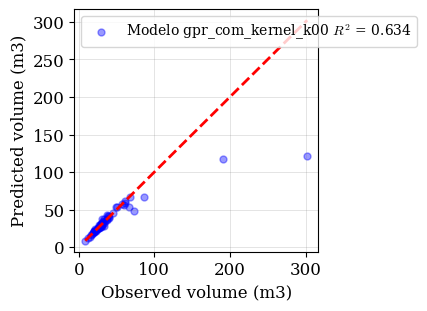

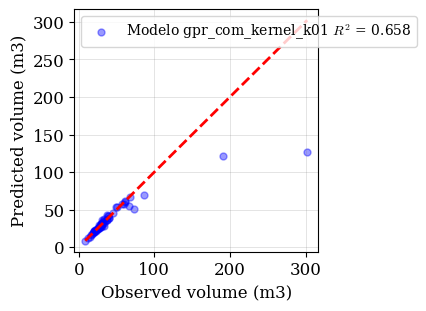

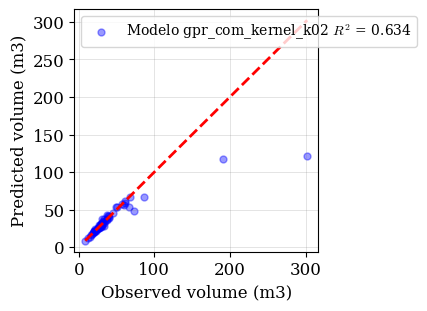

In [23]:
for i in range(len(df_gpr)):
    ### Figure name and DPI
    dpi = 600                                                    # Change as you wish
    name = f'GPR_{df_gpr[i]["modelo"]}_com_{len(x_treino)}_amostras'
    data = pd.DataFrame({
                            "Observed": list(df_gpr[i]["y_obse"]['volume (m3)']),
                            "Predicted": list(df_gpr[i]["y_pred"]['volume (m3)'])
                        })                          # Change as you wish

    ### Chart dimensions (in centimeters)
    b_cm = 8                                                    # Change as you wish
    h_cm = 8                                                    # Change as you wish
    inches_to_cm = 1 / 2.54
    b_input = b_cm * inches_to_cm
    h_input = h_cm * inches_to_cm

    ### Axis and labels (For LateX font format use the dollar sign $)
    label_x = 'Observed volume (m3)'                                        # Change as you wish
    label_y = 'Predicted volume (m3)'                                       # Change as you wish
    size_label = 12                                             # Change as you wish
    color_label = 'black'                                       # or hexadecimal. Change as you wish
    size_axis = 12                                              # Change as you wish
    color_axis = 'black'                                        # or hexadecimal. Change as you wish

    ### Line
    size_line = 2                                               # Change as you wish
    style_line = '--'                                            # Change as you wish
    color_line = 'red'                                          # or hexadecimal. Change as you wish

    ### Scatter
    alpha_scatter = 0.4                                             # Change as you wish
    color_scatter = 'blue'                                          # Change as you wish
    size_scatter = 25                                               # Change as you wish

    ### Legend
    labels_legend = f'Modelo {df_gpr[i]["modelo"]} $R^2$ = {df_gpr[i]["R2_Teste"]:.3f}'                         # Change as you wish
    size_legend = 10                                            # Change as you wish
    location_legend = 'upper left'                              # Change as you wish - 'best' look up by the best fit

    ### Grid
    on_or_off = True
    line_width_grid = 0.5                                       # Change as you wish
    alpha_grid = 0.3                                            # Change as you wish
    style_grid = '-'                                            # Change as you wish
    color_grid = 'gray'                                         # or hexadecimal. Change as you wish

    ### Max and min axis limits
    lims = [
                min(data.min()),
                max(data.max())
            ]   

    ### Figure
    fig, ax = plt.subplots(figsize=(b_input, h_input))
    ax.tick_params(axis='both', which='major', labelsize=size_axis, colors=color_axis)
    ax.set_xlabel(label_x, fontsize=size_label, color=color_label)
    ax.set_ylabel(label_y, fontsize=size_label, color=color_label)

    ### Title. Do you need a title? Use the cell bellow:
    # ax.set_title('Sine Wave Plot', fontsize=16)

    ### Config grid
    plt.grid(on_or_off, which='both', linestyle=style_grid, linewidth=line_width_grid, color=color_grid, alpha=alpha_grid)

    ### Plot data and legend
    ax.plot(lims, lims, linewidth=size_line, linestyle=style_line, color=color_line,)
    ax.scatter(data["Observed"], data["Predicted"], alpha=alpha_scatter, color=color_scatter, s=size_scatter, label=labels_legend)
    ax.legend(fontsize=size_legend, loc=location_legend)

    ### Save. Do you need save? Use the cell bellow:
    fig.savefig(f'z_{name}.png', dpi=dpi, bbox_inches='tight')
    plt.show()

In [24]:
x_treino, x_teste, y_treino, y_teste= train_test_split(x, y, test_size=0.20, random_state=seed)
print("Quantidade de amostras no treino", len(x_treino))
df_gpr = aprendizado_maquina_paralelo(x_treino, y_treino, x_teste, y_teste)

Quantidade de amostras no treino 160


#### Gráficos

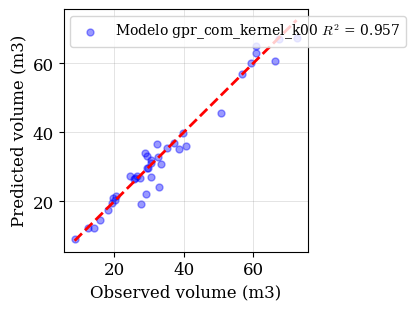

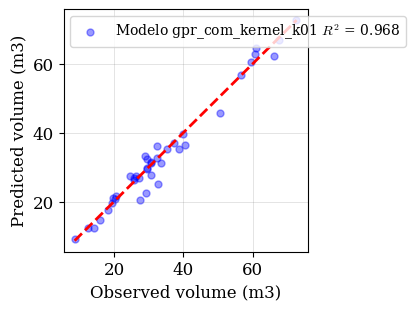

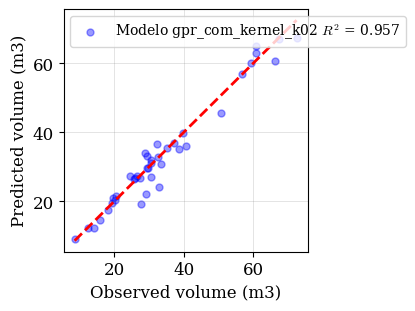

In [25]:
for i in range(len(df_gpr)):
    ### Figure name and DPI
    dpi = 600                                                    # Change as you wish
    name = f'GPR_{df_gpr[i]["modelo"]}_com_{len(x_treino)}_amostras'
    data = pd.DataFrame({
                        "Observed": list(df_gpr[i]["y_obse"]['volume (m3)']),
                        "Predicted": list(df_gpr[i]["y_pred"]['volume (m3)'])
                    })                          # Change as you wish

    ### Chart dimensions (in centimeters)
    b_cm = 8                                                    # Change as you wish
    h_cm = 8                                                    # Change as you wish
    inches_to_cm = 1 / 2.54
    b_input = b_cm * inches_to_cm
    h_input = h_cm * inches_to_cm

    ### Axis and labels (For LateX font format use the dollar sign $)
    label_x = 'Observed volume (m3)'                                        # Change as you wish
    label_y = 'Predicted volume (m3)'                                       # Change as you wish
    size_label = 12                                             # Change as you wish
    color_label = 'black'                                       # or hexadecimal. Change as you wish
    size_axis = 12                                              # Change as you wish
    color_axis = 'black'                                        # or hexadecimal. Change as you wish

    ### Line
    size_line = 2                                               # Change as you wish
    style_line = '--'                                            # Change as you wish
    color_line = 'red'                                          # or hexadecimal. Change as you wish

    ### Scatter
    alpha_scatter = 0.4                                             # Change as you wish
    color_scatter = 'blue'                                          # Change as you wish
    size_scatter = 25                                               # Change as you wish

    ### Legend
    labels_legend = f'Modelo {df_gpr[i]["modelo"]} $R^2$ = {df_gpr[i]["R2_Teste"]:.3f}'                         # Change as you wish
    size_legend = 10                                            # Change as you wish
    location_legend = 'upper left'                              # Change as you wish - 'best' look up by the best fit

    ### Grid
    on_or_off = True
    line_width_grid = 0.5                                       # Change as you wish
    alpha_grid = 0.3                                            # Change as you wish
    style_grid = '-'                                            # Change as you wish
    color_grid = 'gray'                                         # or hexadecimal. Change as you wish

    ### Max and min axis limits
    lims = [
                min(data.min()),
                max(data.max())
            ]   

    ### Figure
    fig, ax = plt.subplots(figsize=(b_input, h_input))
    ax.tick_params(axis='both', which='major', labelsize=size_axis, colors=color_axis)
    ax.set_xlabel(label_x, fontsize=size_label, color=color_label)
    ax.set_ylabel(label_y, fontsize=size_label, color=color_label)

    ### Title. Do you need a title? Use the cell bellow:
    # ax.set_title('Sine Wave Plot', fontsize=16)

    ### Config grid
    plt.grid(on_or_off, which='both', linestyle=style_grid, linewidth=line_width_grid, color=color_grid, alpha=alpha_grid)

    ### Plot data and legend
    ax.plot(lims, lims, linewidth=size_line, linestyle=style_line, color=color_line,)
    ax.scatter(data["Observed"], data["Predicted"], alpha=alpha_scatter, color=color_scatter, s=size_scatter, label=labels_legend)
    ax.legend(fontsize=size_legend, loc=location_legend)

    ### Save. Do you need save? Use the cell bellow:
    fig.savefig(f'z_{name}_pt.png', dpi=dpi, bbox_inches='tight')
    plt.show()

In [26]:
df_gpr[0]

{'modelo': 'gpr_com_kernel_k00',
 'arquivo': 'modelos\\gpr_com_kernel_k00_pop_160.pkl',
 'R2_Treino': 0.9999999999999996,
 'R2_Teste': 0.9571989265677074,
 'MAE': 2.260127160850273,
 'RMSE': 3.2694401253029586,
 'y_obse':      volume (m3)
 95     60.745589
 15     28.843235
 30     32.436470
 158    25.855636
 128    35.260529
 115    29.613431
 69     15.926333
 170    14.309731
 174    72.472140
 45     29.549810
 66     30.739853
 182     8.652435
 165    20.690540
 78     29.604228
 186    24.596410
 177    30.568533
 56     18.141202
 152    59.410004
 82     38.720144
 68     26.491416
 124    37.318751
 16     29.108359
 148    27.633483
 93     50.634141
 65     32.538913
 60     32.821561
 84     39.881634
 67     67.499459
 125    66.162565
 132    20.249166
 9      27.363246
 18     12.472162
 55     19.428912
 75     56.757644
 150    25.927831
 104    19.815427
 135    30.683073
 137    60.894908
 164    40.642423
 76     33.638044,
 'y_pred':     volume (m3)
 0     63.106